## Скорость операций

Рассмотрим ситуацию, в которой к каждому элементу последовательности необходимо добавить некоторую константу. Реализуем это с помощью python и numpy, сравним время вычислений.

In [ ]:
import datetime
start = datetime.datetime.now()

a = [1 for i in range(100000000)]
a = [elem + 10 for elem in a]

end = datetime.datetime.now()
(end-start).seconds

14

In [ ]:
import datetime
import numpy as np
start = datetime.datetime.now()

a = np.arange(100000000)
a = a+10

end = datetime.datetime.now()
(end-start).seconds

0

## Векторные операции

Важно отметить разницу между поэлементными операциями с массивами и операциями из линейной алгебры.

Перемножение массивов:

In [ ]:
a = np.array([1, 2, 3])
b = np.array([3, 4, 5])

In [ ]:
a * b

array([ 3,  8, 15])

In [ ]:
# вещание позволяет умножать все элементы на скаляр
a * 2

array([2, 4, 6])

Перемножение векторов:

В этом примере происходит перемножение двух векторов, операция скларного произведения. В примере показано два варианта использования синтаксиса.

In [ ]:
a @ b

26

In [ ]:
np.dot(a, b)

26

## Матричные операции

Как и в случае с векторами следует отличать операции с массивами и матричные операции.

Умножение массивов (поэлементные операции на одинаковых индексах)

In [ ]:
a = np.array([[3, 1], [1, 2]])
b = np.array([[1, 3], [2, 4]])

a * b

array([[3, 3],
       [2, 8]])

In [ ]:
# вещание может происходить, если размер строки == размеру вектора
a = np.array([[3, 1], [1, 2]])
b = np.array([[-1, 2]])

a * b

array([[-3,  2],
       [-1,  4]])

Умножение матричное:

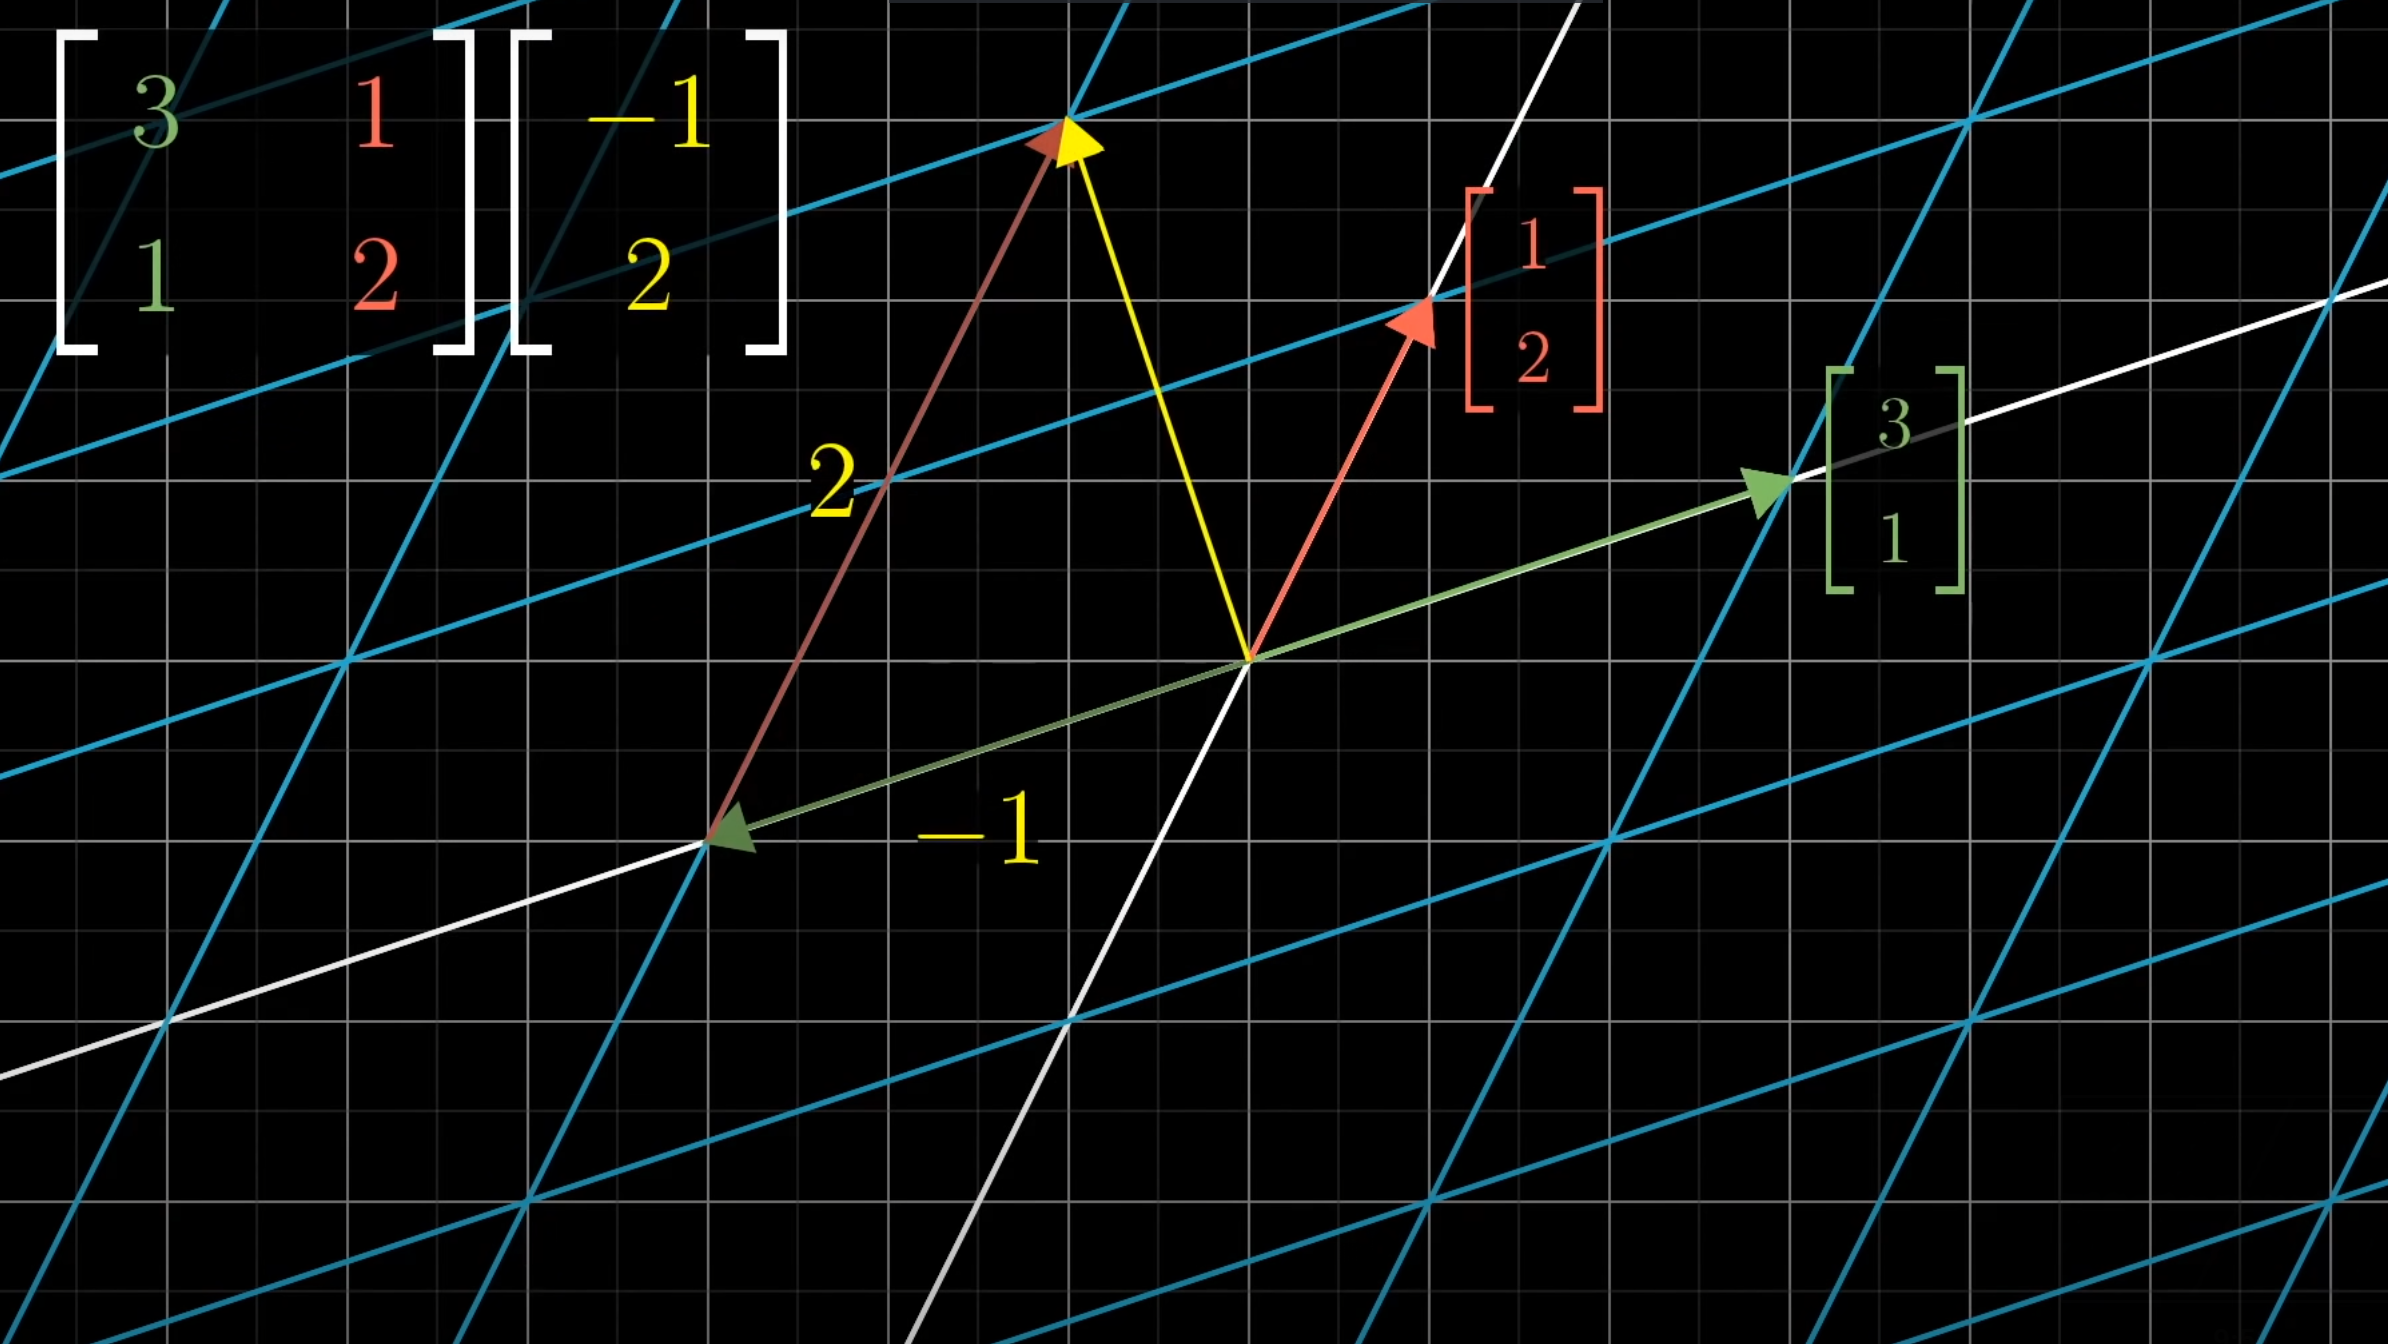

In [ ]:
b @ a

array([[-1,  3]])

Рассмотрим еще один пример действия матрицы на вектор. Обычно такую матрицу назвают матрицей поворота:

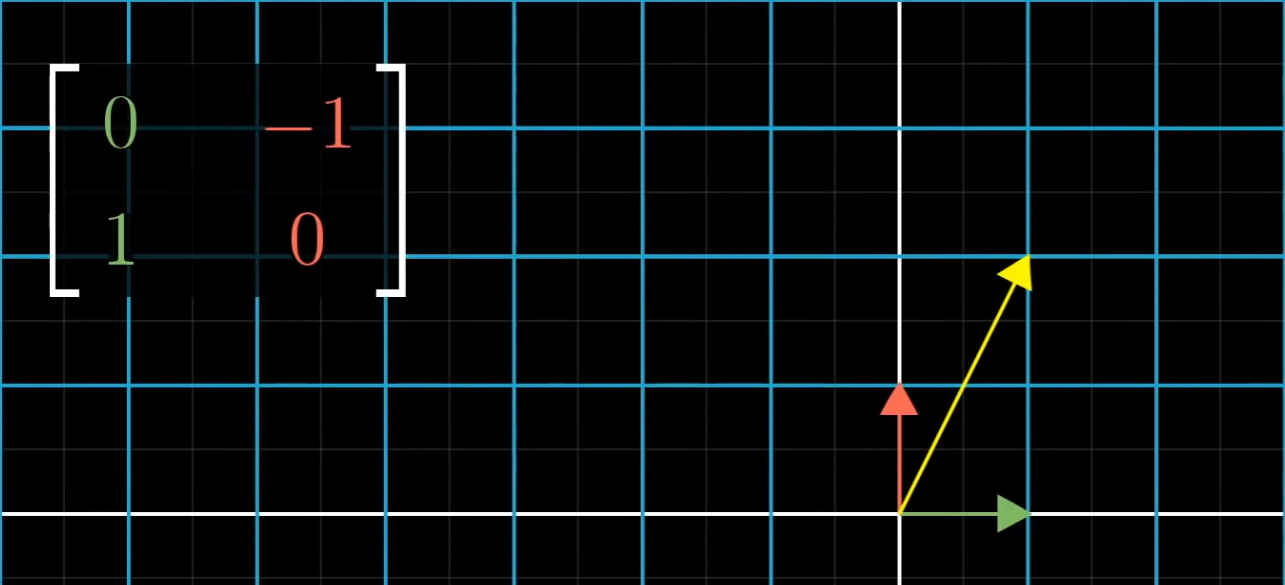

In [ ]:
a = np.array([[0, -1], [1, 0]])
b = np.array([1, 2])

In [ ]:
a @ b

array([-2,  1])

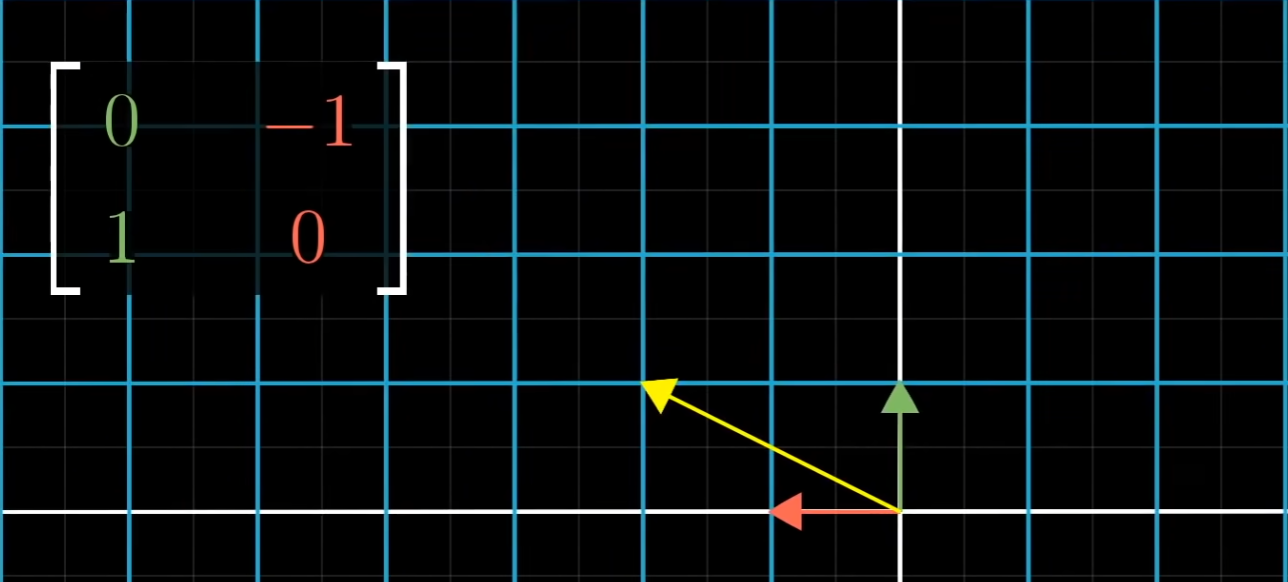

## Инициализация и свойства матриц

Для создания последовательностей чисел NumPy предоставляет функцию arange, аналогичную встроенному в Python range, но возвращающую массив.

In [ ]:
np.arange(10, 30, 5)

array([10, 15, 20, 25])

Функция arange может использовать аргументы с плавающей запятой, но как правило невозможно предсказать количество полученных элементов из-за конечной точности плавающей запятой. По этой причине обычно лучше использовать функцию linspace, которая получает в качестве аргумента количество элементов, которое мы хотим, вместо шага:

In [ ]:
np.linspace(0, 2, 9)

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

Функция zeros создает массив из нулей, функция one создает массив из единиц, а функция empty создает массив, начальное содержимое которого является случайным и зависит от состояния оперативной памяти. По умолчанию dtype создаваемого массива — float64, но его можно указать с помощью аргумента ключевого слова dtype.

In [ ]:
np.zeros((3, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [ ]:
np.ones((2, 3, 4), dtype=np.int16)

array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]], dtype=int16)

In [ ]:
np.empty((2, 3))

array([[1.50436665e-316, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000]])

Функция генерирует случайны числа из нормального распределения:

In [ ]:
mu, sigma = 0, 0.1 # среднее и стандартное отклонение
np.random.normal(mu, sigma, 10)

array([ 0.09526908,  0.13689991,  0.09391035,  0.13086895,  0.03100157,
        0.02473998, -0.21782552,  0.13571666,  0.04408531,  0.06763211])

In [ ]:
np.random.rand(3,2)

array([[0.89309997, 0.04270643],
       [0.70458653, 0.88671269],
       [0.24029703, 0.62335385]])

Массив формы size из случайных целых чисел:

In [ ]:
np.random.randint(3, size=(10, 2))

array([[0, 0],
       [0, 1],
       [0, 0],
       [2, 1],
       [2, 1],
       [2, 1],
       [2, 1],
       [0, 2],
       [1, 1],
       [0, 2]])

## Операции линейной алгебры


In [ ]:
from numpy import linalg as LA

In [ ]:
a = np.arange(9).reshape(3, 3)
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

Операция транспонирования матрицы:

In [ ]:
a.T

array([[0, 3, 6],
       [1, 4, 7],
       [2, 5, 8]])

Норма матрицы:

In [ ]:
LA.norm(a)

14.2828568570857

Рассмотрим систему уравнений:

$\left\{\begin{matrix}x_0 + 2x_1 - 3x_2 = 4\\ 2x_0 + x_1 + 2x_2 = 3\\ 3x_0 -2x_1-x_2 = 9\end{matrix}\right.$

Мы можем переписать их как матрицу коэффициентов возле $x_1, x_2, x_3$ и вектор-столбец ответов.

In [ ]:
a = np.array([[1, 2, -3],
            [2, 1, 2],
            [3, -2, -1]])

b = np.array([4, 3, 9])

Numpy позволяет решать системы линейных уравнений:

In [ ]:
x = LA.solve(a, b)
x

array([ 2.475, -0.4  , -0.775])

In [ ]:
# перепроверим результат вычислений:
np.dot(a, x)

array([4., 3., 9.])

В машинном обучении часто требуется найти обратную матрицу, numpy позволяет делать и это:

In [ ]:
a = np.random.randint(10, size = (6, 6))
a

array([[7, 6, 5, 9, 6, 2],
       [4, 2, 4, 9, 0, 9],
       [6, 1, 1, 1, 2, 4],
       [0, 2, 7, 3, 1, 7],
       [7, 5, 3, 5, 5, 1],
       [5, 0, 0, 4, 7, 4]])

In [ ]:
inv = np.linalg.inv(a)
inv

array([[ 0.50580685, -0.13508557,  0.48257946, -0.09015892, -0.61338631,
        -0.12041565],
       [-1.28249796,  0.34372453, -0.81917278,  0.09667889,  1.72667074,
         0.08618582],
       [ 0.91982478, -0.3103097 ,  0.57385901,  0.06061532, -1.11868378,
        -0.16198044],
       [ 0.31784841,  0.02689487,  0.04645477, -0.09290954, -0.36430318,
        -0.01222494],
       [-0.16208231, -0.03647107, -0.18041972,  0.06917278,  0.21750204,
         0.16809291],
       [-0.66646292,  0.20578647, -0.33394458,  0.08455583,  0.7504075 ,
         0.11858191]])

Проверим, что найденная обратная матрица, при умножении на исходную, даст единичную:

In [ ]:
a@inv

array([[ 1.00000000e+00, -4.99600361e-16, -5.55111512e-16,
         1.38777878e-16,  2.22044605e-16, -5.55111512e-17],
       [-1.44328993e-15,  1.00000000e+00, -1.16573418e-15,
         0.00000000e+00,  3.33066907e-16,  8.32667268e-17],
       [ 0.00000000e+00, -4.44089210e-16,  1.00000000e+00,
         1.11022302e-16, -1.33226763e-15,  0.00000000e+00],
       [-3.33066907e-16,  8.32667268e-17, -1.66533454e-16,
         1.00000000e+00,  5.55111512e-16, -8.32667268e-17],
       [-7.77156117e-16, -3.05311332e-16, -9.43689571e-16,
         9.71445147e-17,  1.00000000e+00, -2.77555756e-17],
       [ 0.00000000e+00, -4.44089210e-16,  0.00000000e+00,
        -1.11022302e-16, -2.22044605e-15,  1.00000000e+00]])